# Universalidad de la corrupción
En esta sección se programa la dinámica o el modelo propuesto por los investigadores para recrear las redes de tipo corrupto.

In [6]:
import numpy as np
import networkx as nx
from pyvis.network import Network

def simulate_corruption_network(num_iterations, characteristic_size, recidivism_rate, beta, p):
    """
    Simula una red de corrupción usando el modelo propuesto por los investigadores.

    Parámetros:
    num_iterations (int): Número de iteraciones (escándalos) a simular.
    characteristic_size (float): Tamaño característico de los escándalos de corrupción.
    recidivism_rate (float): Tasa de reincidencia.
    beta (float): Controla el número mínimo de personas necesarias para la aparición de los primeros agentes reincidentes.
    p (float): Probabilidad de seleccionar nodos que ya eran reincidentes.

    Devuelve:
    nx.Graph: La red de corrupción simulada.
    """

    graph = nx.Graph()
    total_agents = 0
    recidivists = 0

    for i in range(num_iterations):
        # 1. Escoger el tamaño del escándalo de una distribución exponencial
        scandal_size = int(np.random.exponential(characteristic_size)) + 1  # +1 para evitar tamaño 0
        new_agents = range(total_agents, total_agents + scandal_size)

        # 2. Añadir nuevos agentes al grafo
        graph.add_nodes_from(new_agents)

        # 3. Calcular el número de reincidentes
        r = int(recidivism_rate * total_agents - beta)
        r = max(0, min(r, scandal_size))  # Asegurar que el número de reincidentes sea válido

        # 4. Seleccionar agentes reincidentes
        if total_agents > 0 and r > 0:
            # Determinar cuántos reincidentes nuevos y viejos seleccionar
            num_old_recidivists = int(np.random.binomial(r, p))
            num_new_recidivists = r - num_old_recidivists

            old_recidivists = []
            if num_old_recidivists > 0:
                #Identificar los nodos que ya son reincidentes
                already_recidivists = [node for node, data in graph.nodes(data=True) if data.get('recidivist', False)]
                if already_recidivists:
                    old_recidivists = np.random.choice(already_recidivists, size=min(num_old_recidivists, len(already_recidivists)), replace=False)

            new_recidivists = []
            if num_new_recidivists > 0:
                # Asegurarse de no seleccionar los mismos nodos que old_recidivists
                eligible_nodes = [node for node in graph.nodes() if node not in old_recidivists and node < total_agents]
                if eligible_nodes:
                    new_recidivists = np.random.choice(eligible_nodes, size=min(num_new_recidivists, len(eligible_nodes)), replace=False)

            recidivist_agents = np.concatenate((old_recidivists, new_recidivists))

            # Marcar los nuevos reincidentes como tales
            for agent in new_recidivists:
                graph.nodes[agent]['recidivist'] = True

            # 5. Crear conexiones entre todos los agentes en el escándalo (gráfico completo)
            all_agents = np.concatenate((new_agents, recidivist_agents)).astype(int)
            for agent1 in all_agents:
                for agent2 in all_agents:
                    if agent1 != agent2:
                        graph.add_edge(agent1, agent2)
        else:
            #Si no hay reincidentes, crear conexiones entre los nuevos agentes
            for agent1 in new_agents:
                for agent2 in new_agents:
                    if agent1 != agent2:
                        graph.add_edge(agent1, agent2)

        total_agents += scandal_size
        recidivists += r

    return graph

# Ejemplo de uso
num_iterations = 437  # Número de escándalos en España
characteristic_size = 7
recidivism_rate = 0.09  # Tasa de reincidencia en España
beta = 12
p = 0.025

corruption_network = simulate_corruption_network(num_iterations, characteristic_size, recidivism_rate, beta, p)

print(f"Número de nodos en la red: {corruption_network.number_of_nodes()}")
print(f"Número de aristas en la red: {corruption_network.number_of_edges()}")

Número de nodos en la red: 3147
Número de aristas en la red: 70330


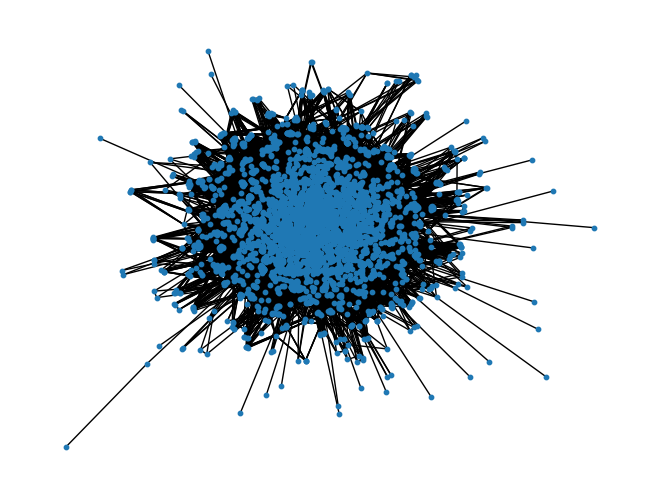

In [ ]:
# Visualizar la red creada usando mathplotlib
import matplotlib.pyplot as plt
nx.draw(corruption_network, with_labels=False, node_size=10)
plt.show()  


In [8]:
from pyvis.network import Network

# Crear una instancia de Network
net = Network(notebook=True)

# Añadir nodos y aristas a la visualización
for node in corruption_network.nodes():
    net.add_node(node, label=str(node))

for edge in corruption_network.edges():
    net.add_edge(edge[0], edge[1])

# Guardar la visualización en un archivo HTML
net.show("corruption_network.html")


corruption_network.html


TypeError: Object of type int64 is not JSON serializable